In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

In [111]:
env_fields = pd.read_csv('env_fields.csv')
health_fields = pd.read_csv('health_fields.csv')
socio_fields = pd.read_csv('socio_fields.csv')

df = pd.read_csv('Group1DatasetCleaned.csv')
df

CountryShortName    Year  Life expectancy at birth, female (years)  \
0         Afghanistan  2008.0                                    61.529   
1         Afghanistan  2009.0                                    61.892   
2         Afghanistan  2010.0                                    62.408   
3         Afghanistan  2011.0                                    62.993   
4         Afghanistan  2012.0                                    63.514   
...               ...     ...                                       ...   
2881         Zimbabwe  2017.0                                    62.956   
2882         Zimbabwe  2018.0                                    63.594   
2883         Zimbabwe  2019.0                                    63.661   
2884         Zimbabwe  2020.0                                    63.862   
2885         Zimbabwe  2021.0                                    62.045   

      Life expectancy at birth, male (years)  \
0                                     58.172   
1                                     58.820   
2                                     59.278   
3                                     59.825   
4                                     60.317   
...                                      ...   
2881                                  58.208   
2882                                  58.968   
2883                                  58.644   
2884                                  58.129   
2885                                  56.232   

      Life expectancy at birth, total (years)  \
0                                      59.852   
1                                      60.364   
2                                      60.851   
3                                      61.419   
4                                      61.923   
...                                       ...   
2881                                   60.709   
2882                                   61.414   
2883                                   61.292   
2884                                   61.124   
2885                                   59.253   

      GOAL 13: Climate Action (5 year moving average)  \
0                                               0.000   
1                                               0.000   
2                                               0.000   
3                                               0.000   
4                                               0.000   
...                                               ...   
2881                                            0.500   
2882                                            0.500   
2883                                            1.000   
2884                                            1.000   
2885                                            0.667   

      Pillar 3 - Data Products - Score  \
0                             50.95000   
1                             50.20625   
2                             46.65625   
3                             47.91875   
4                             49.16875   
...                                ...   
2881                          60.91250   
2882                          61.17500   
2883                          70.23750   
2884                          75.51250   
2885                          87.96250   

      GOAL 10: Reduced Inequality (5 year moving average)  \
0                                                 0.500     
1                                                 0.500     
2                                                 0.500     
3                                                 0.400     
4                                                 0.400     
...                                                 ...     
2881                                              0.600     
2882                                              0.600     
2883                                              0.600     
2884                                              0.571     
2885                                              0.750     

      GOAL 11: 

In [112]:
import pandas as pd

# Assume df is your main DataFrame with dummy-encoded region columns.
# For example, your columns might be: 'Region_East Asia', 'Region_South Asia', etc.

# Identify region dummy columns. Adjust the prefix as needed.
region_dummy_cols = [col for col in df.columns if col.startswith("Region_")]

# Create a new 'Region' column from the dummy variables:
df['Region'] = df[region_dummy_cols].idxmax(axis=1)

# Optionally, remove the "Region_" prefix to get just the region name:
df['Region'] = df['Region'].str.replace("Region_", "", regex=False)

df.to_csv('df.csv')


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_field_by_region_over_time(df, field, region_col='Region', year_col='Year', aggfunc='mean'):
    # Check if the field exists
    if field not in df.columns:
        print(f"Field '{field}' not found. Skipping.")
        return

    # Prepare data: select relevant columns, drop NaNs, then group & aggregate
    data = df[[region_col, year_col, field]].dropna()
    data = data.groupby([region_col, year_col], as_index=False).agg({field: aggfunc})
    
    # Create a wider figure so the graph area is longer
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot a Seaborn lineplot with markers
    sns.lineplot(data=data, x=year_col, y=field, hue=region_col, marker='o', ax=ax)
    
    # Set title and axes labels
    ax.set_title(f"{field} by {region_col} over Time")
    ax.set_xlabel(year_col)
    ax.set_ylabel("Average Value")
    
    # Determine x-axis range and ticks
    all_years = sorted(data[year_col].unique())
    ax.set_xlim(left=all_years[0])        # Start at the first year
    ax.set_xticks(all_years[::2])         # Show every other year label
    
    # Automatically adjust the y-axis if data dips below zero
    y_min = data[field].min()
    y_bottom = min(0, y_min)              # Bottom is negative if y_min < 0, else 0
    ax.set_ylim(bottom=y_bottom)
    
    # Remove x-axis margins so the plot area starts immediately at the left
    ax.margins(x=0)
    
    # Place legend outside the main plot
    ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()


def create_eda_visuals_for_fields(fields_csv, df, region_col='Region', year_col='Year', aggfunc='mean'):
    # Read CSV (assumes field names are in the second column)
    fields_df = pd.read_csv(fields_csv)
    fields_list = fields_df.iloc[:, 1].tolist()
    
    # Generate a plot for each field
    for field in fields_list:
        plot_field_by_region_over_time(df, field, region_col, year_col, aggfunc=aggfunc)


In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Year' to integers (if necessary)
df['Year'] = df['Year'].round().astype(int)

# Increase the figure size for clarity
plt.figure(figsize=(12, 6))

# Create the Seaborn lineplot with error bars (95% confidence intervals) and markers.
sns.lineplot(
    data=df,
    x="Year",
    y="Life expectancy at birth, total (years)",
    hue="Region",
    estimator='mean',
    errorbar=('ci', 95),  # Use errorbar parameter instead of deprecated 'ci'
    marker="o",          # Markers for each data point
    sort=True
)

# Set x-axis ticks to display all integer years in the dataset
start_year = df['Year'].min()
end_year = df['Year'].max()
plt.xticks(range(start_year, end_year + 1), rotation=45)

# Start the y-axis at 0
plt.ylim(bottom=0)

# Add a title and adjust the layout
plt.title("Average Life Expectancy at Birth by Region Over Time")
plt.show()


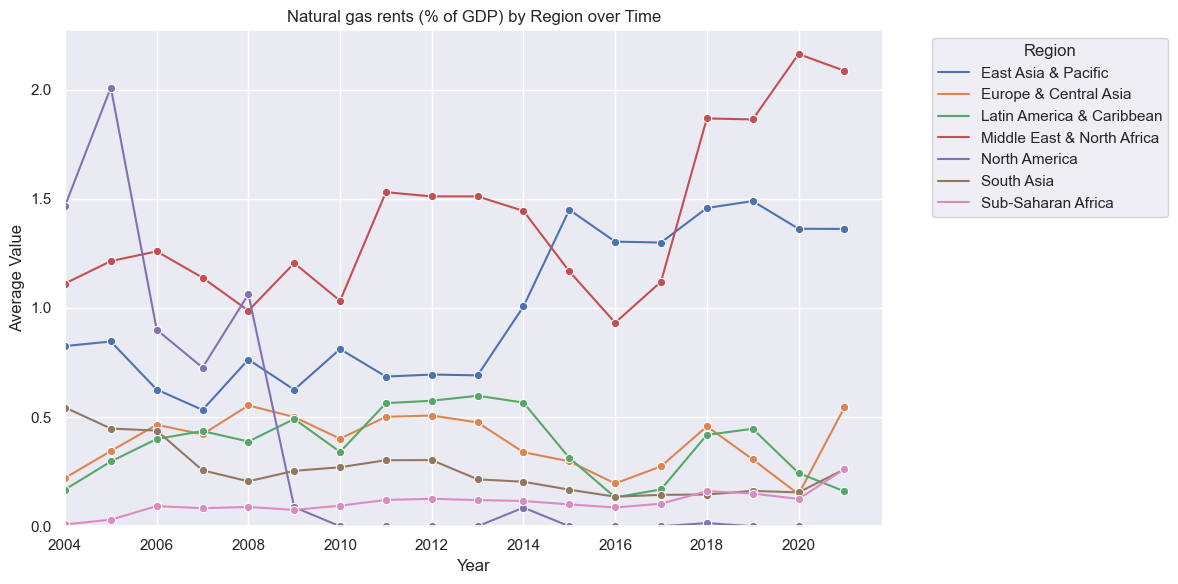

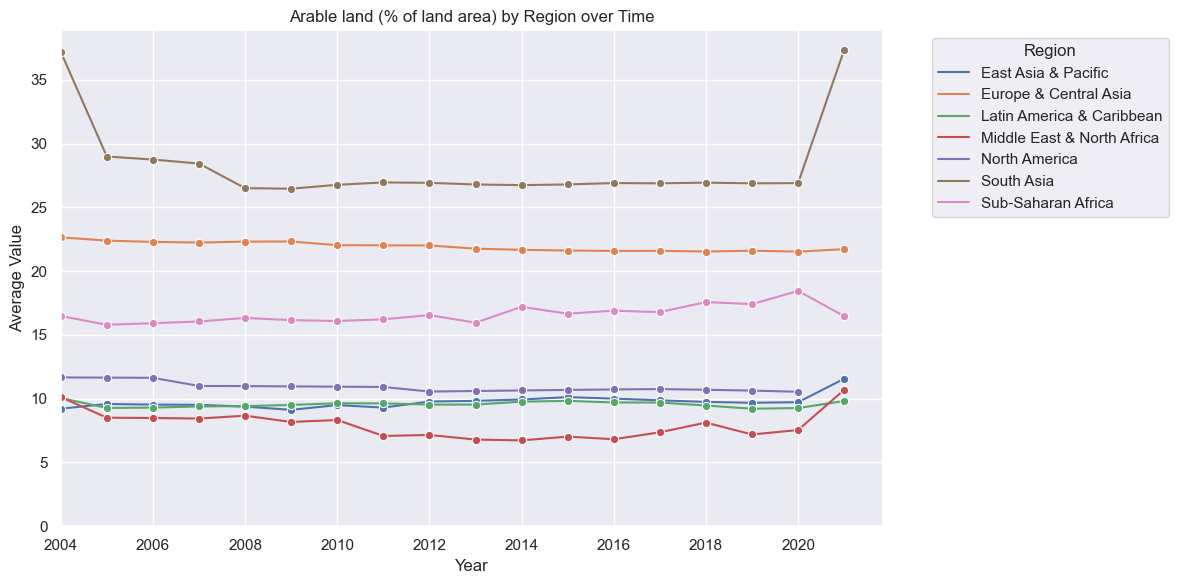

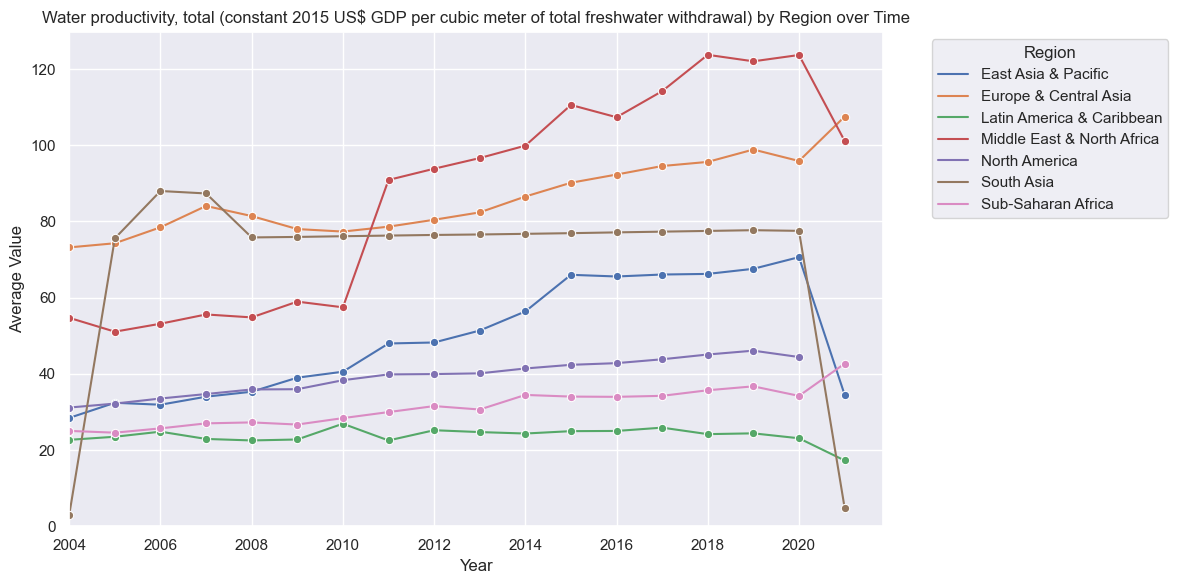

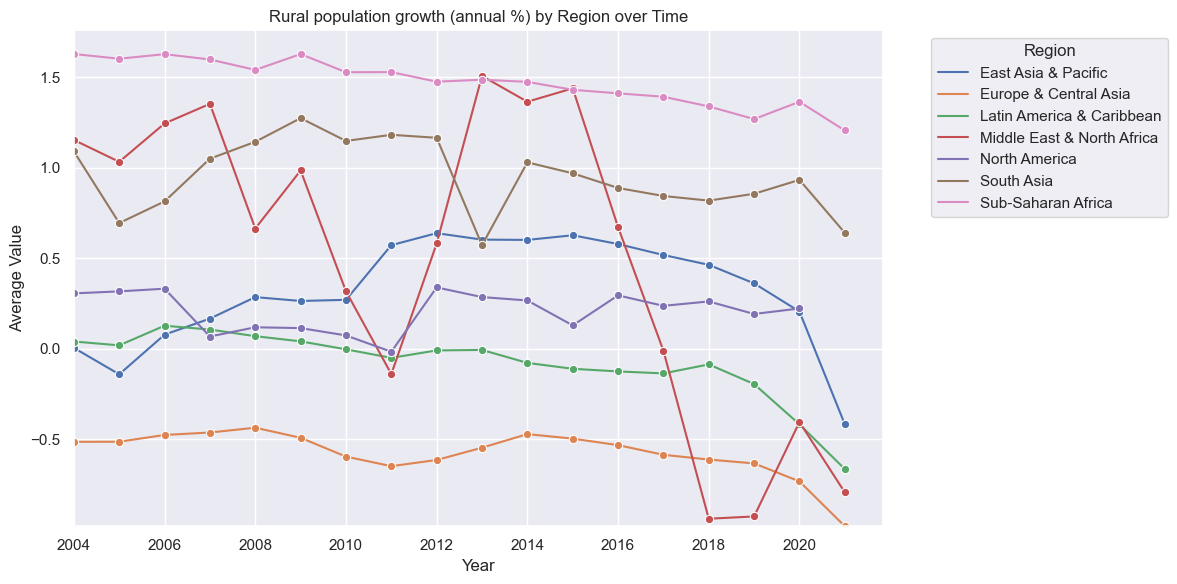

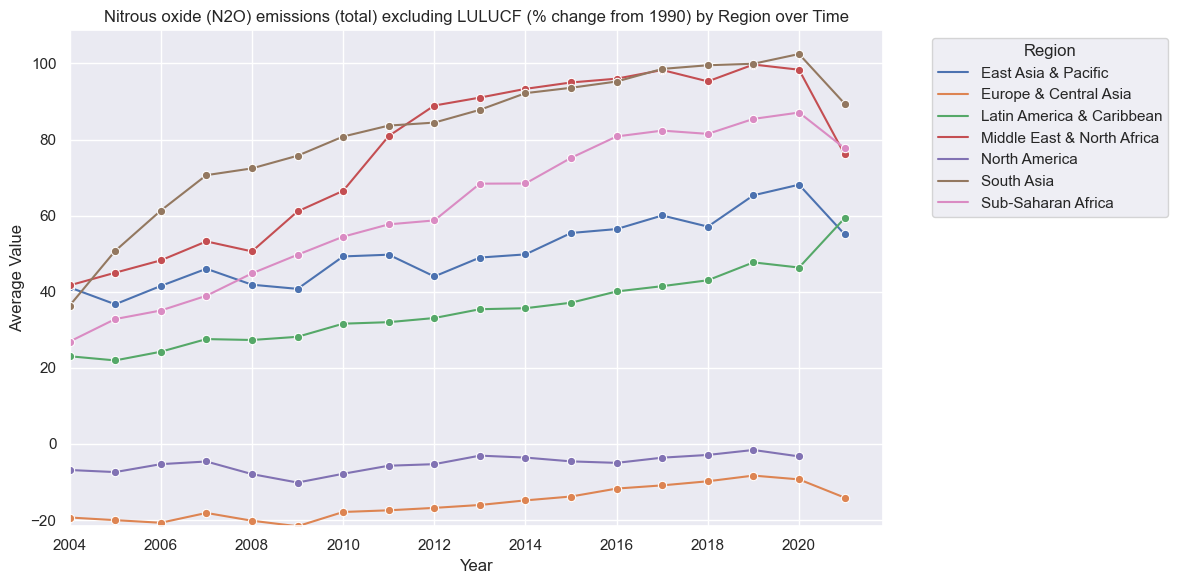

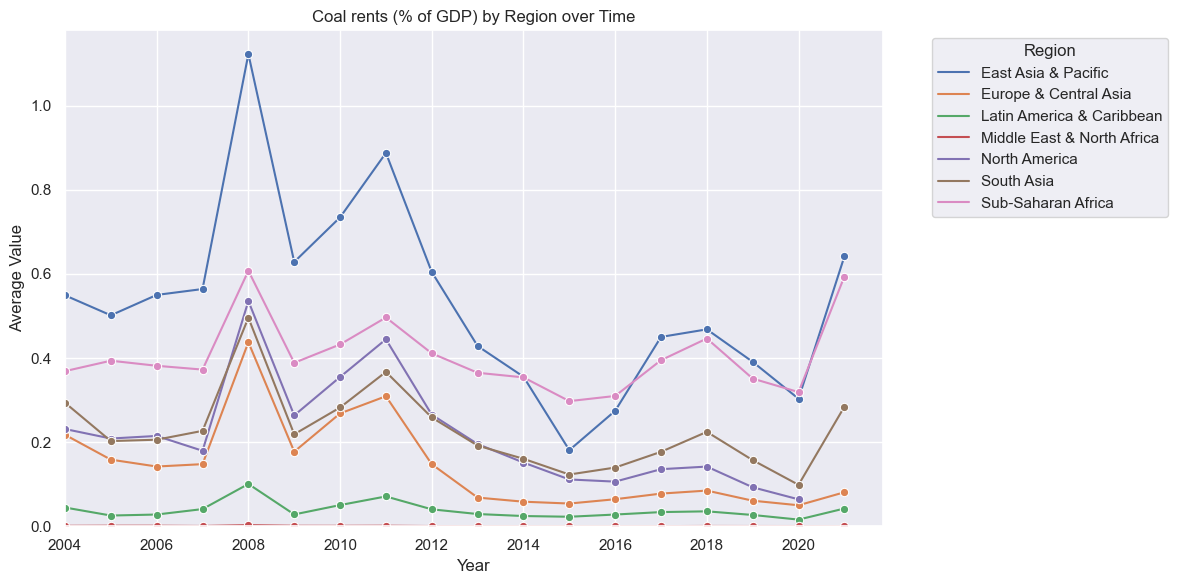

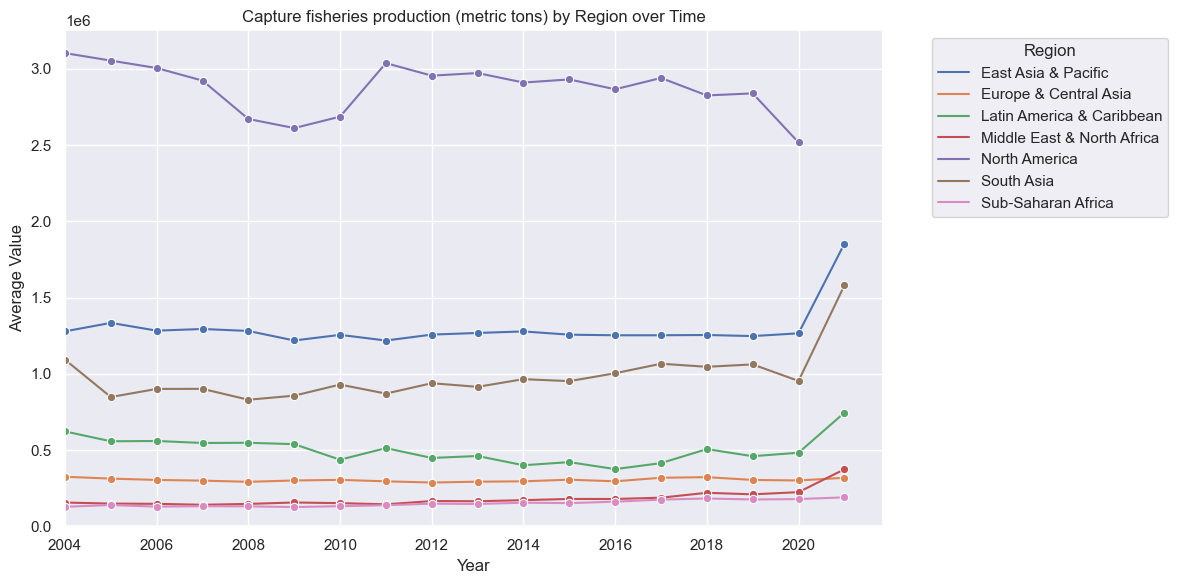

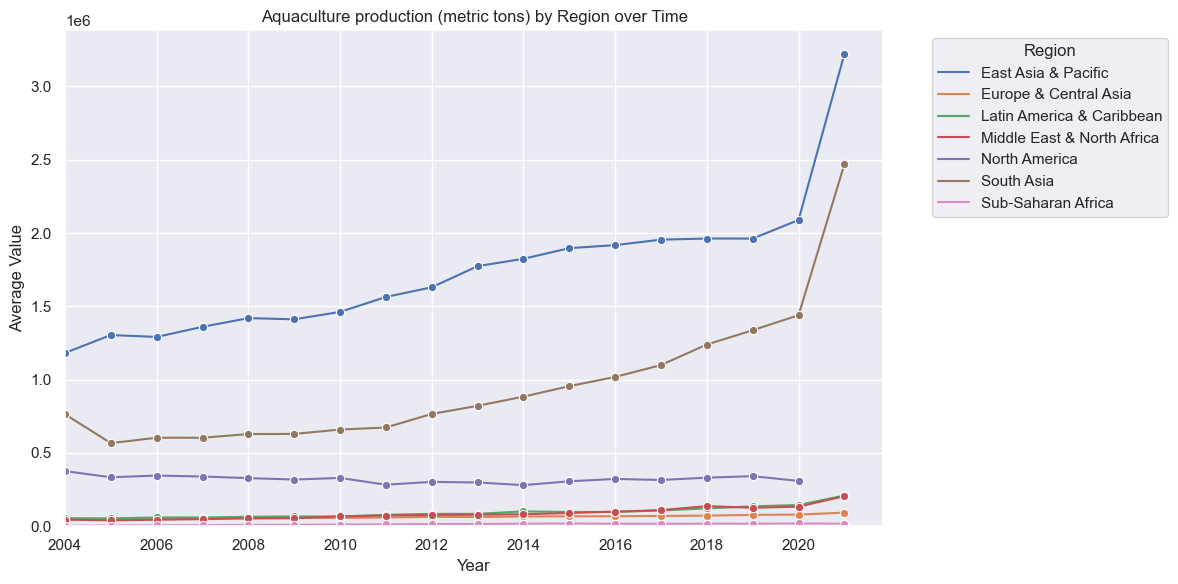

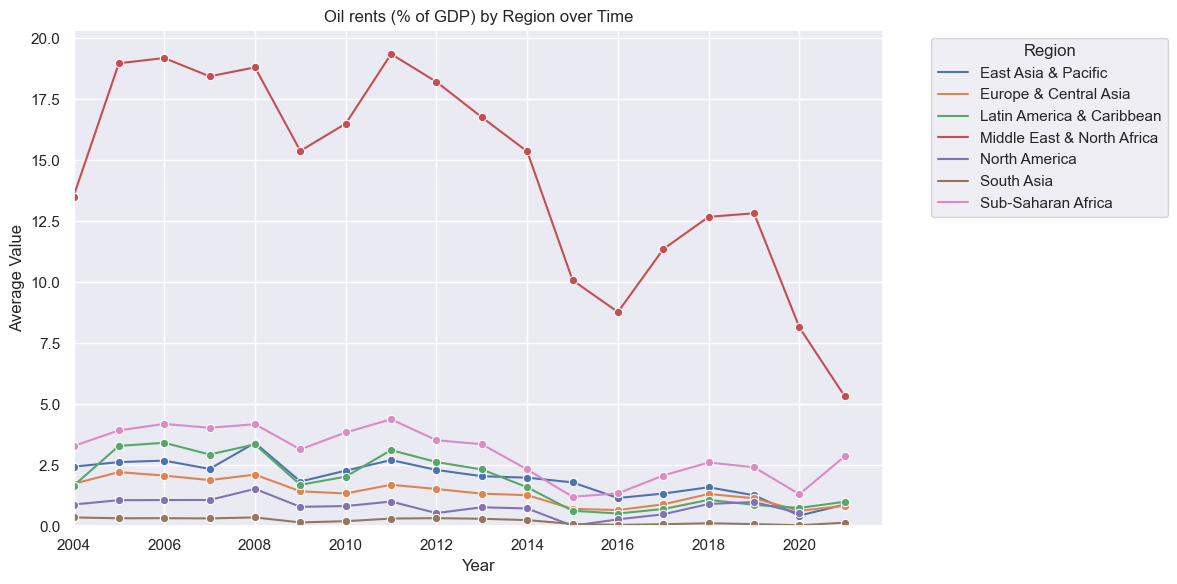

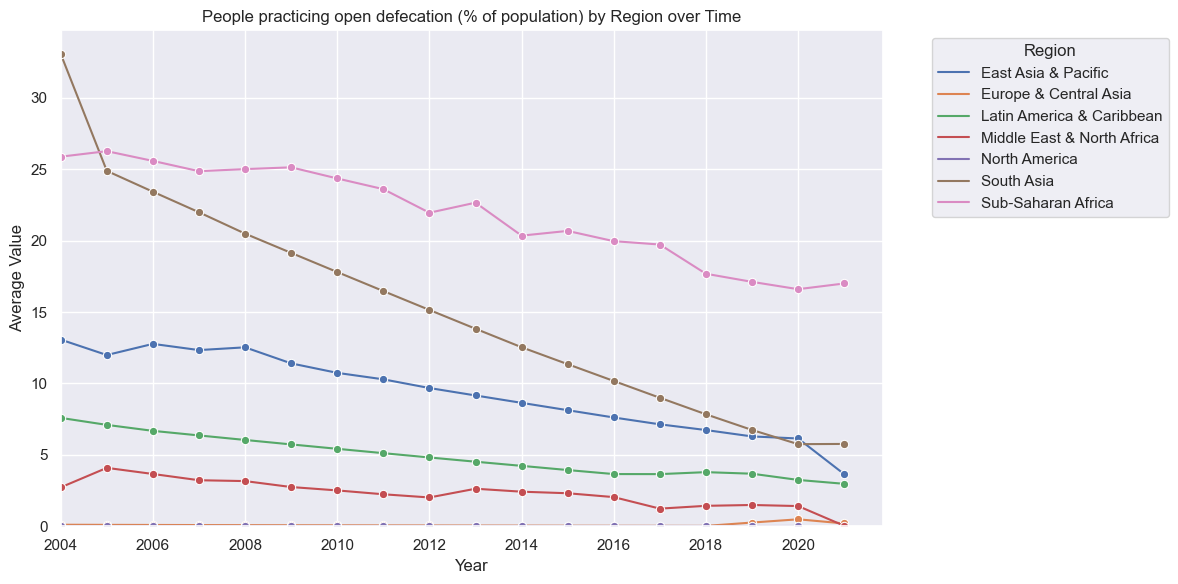

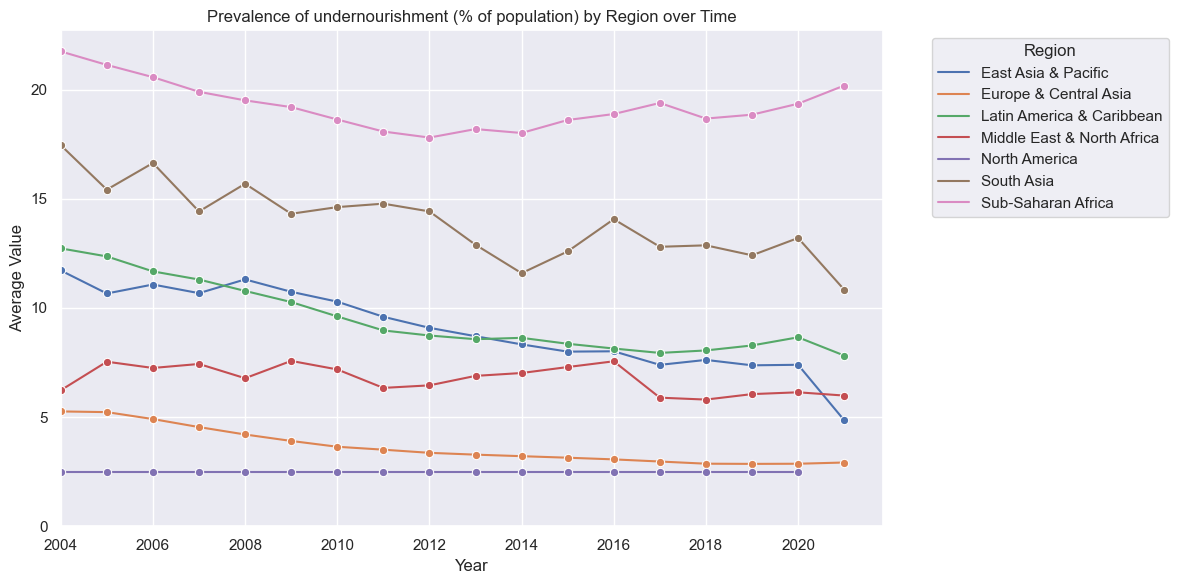

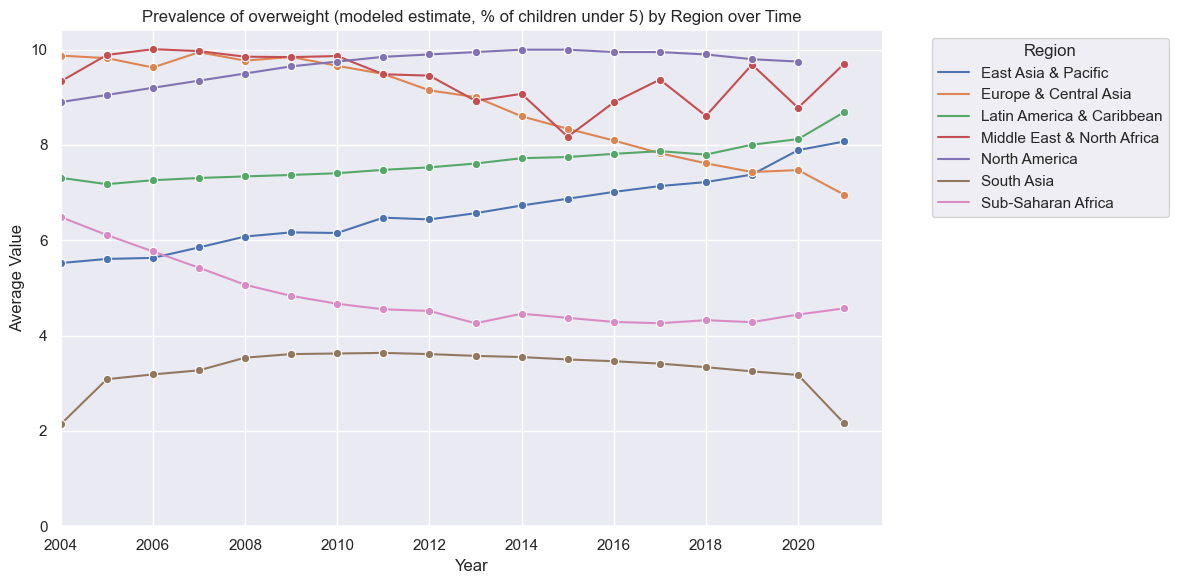

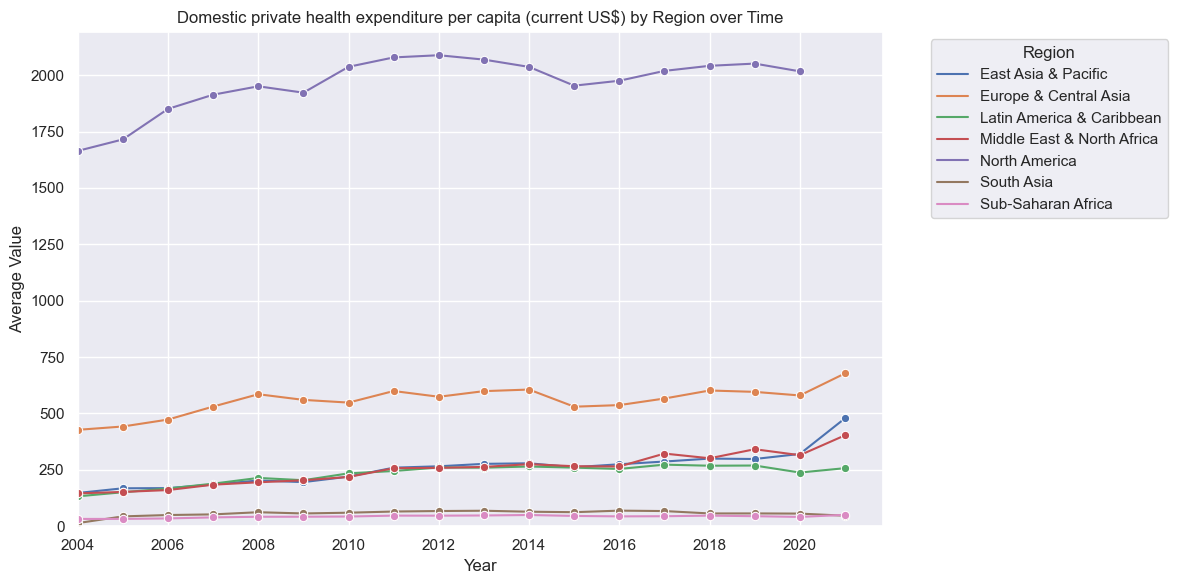

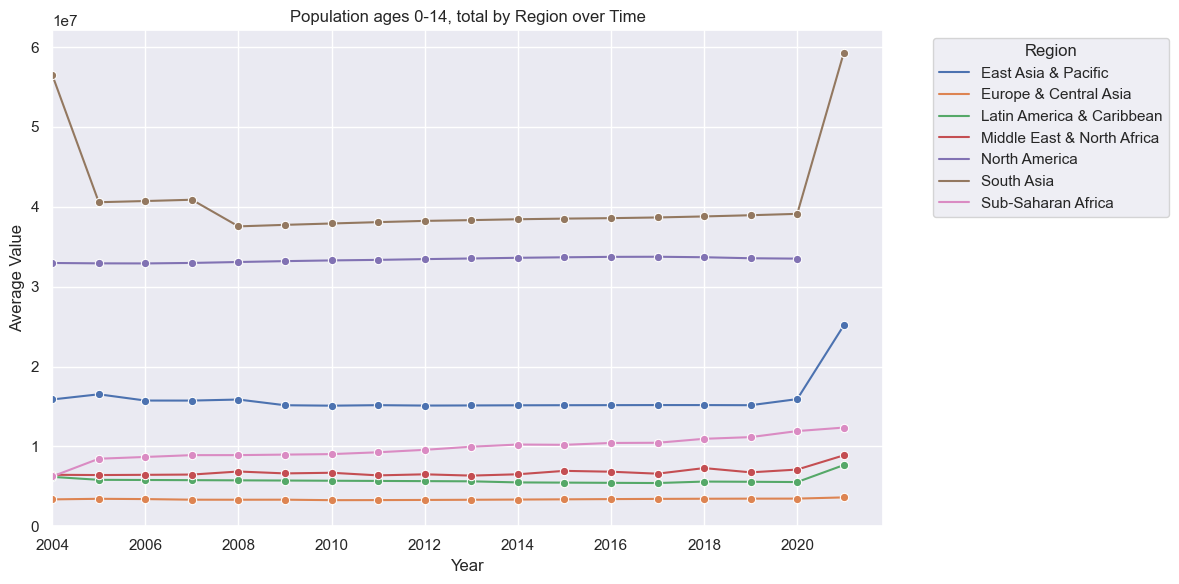

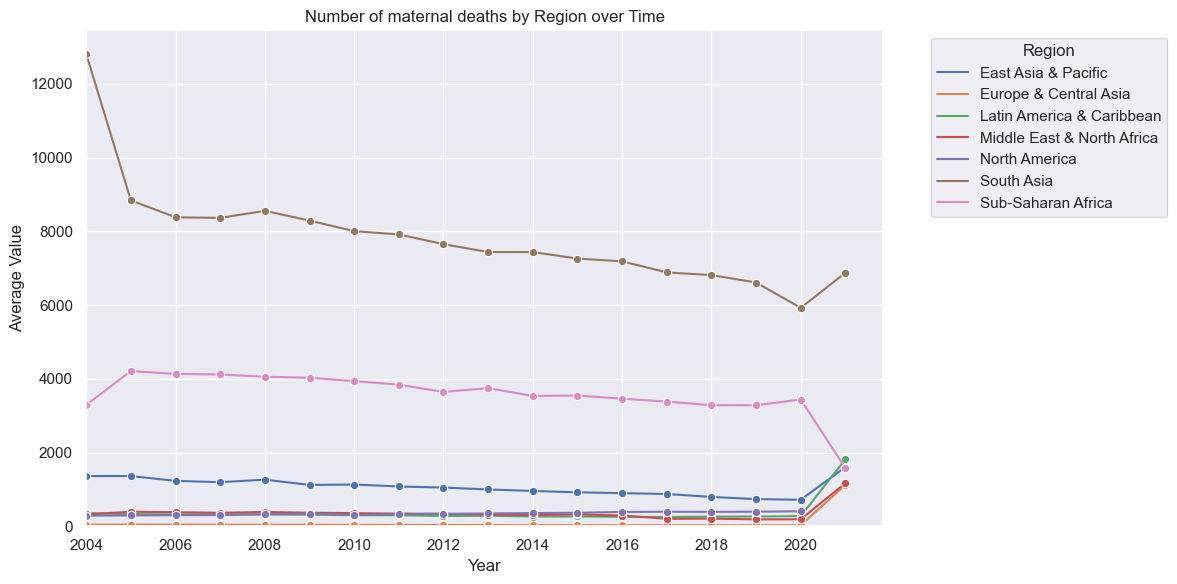

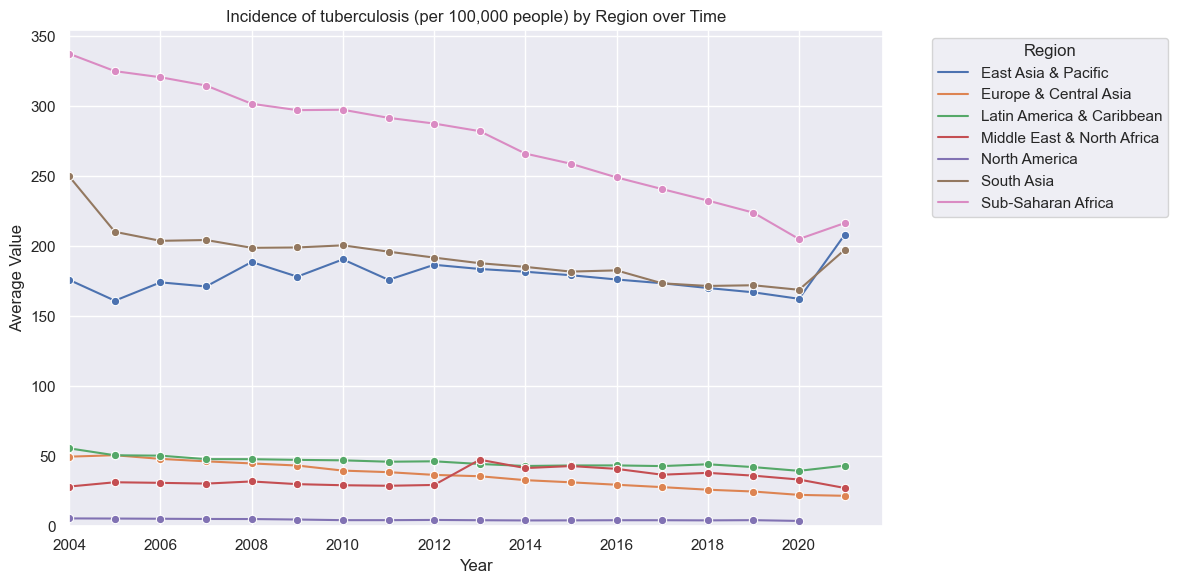

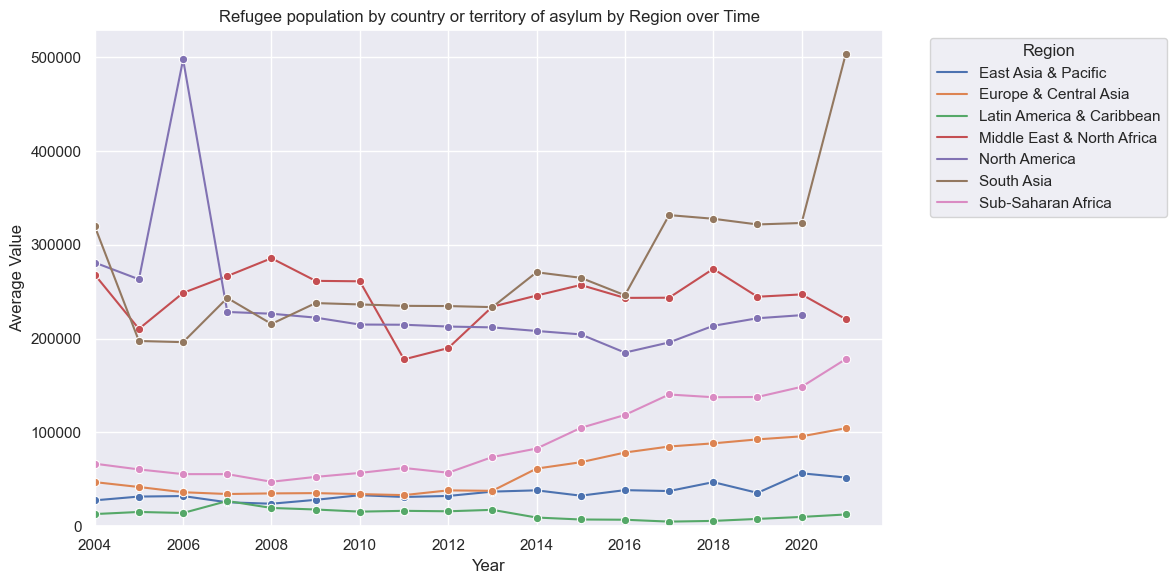

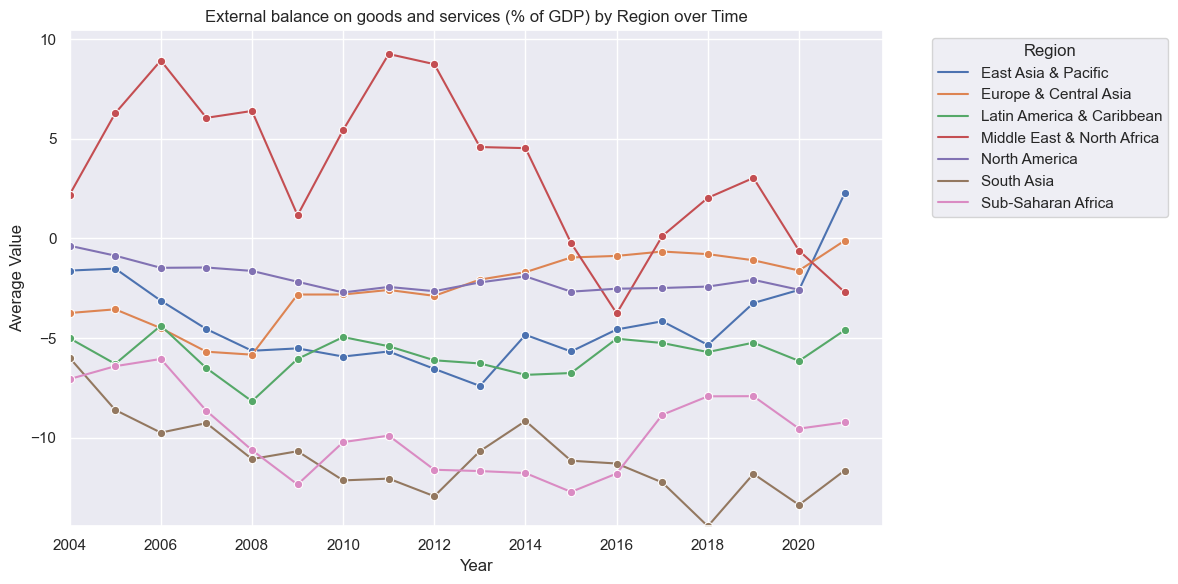

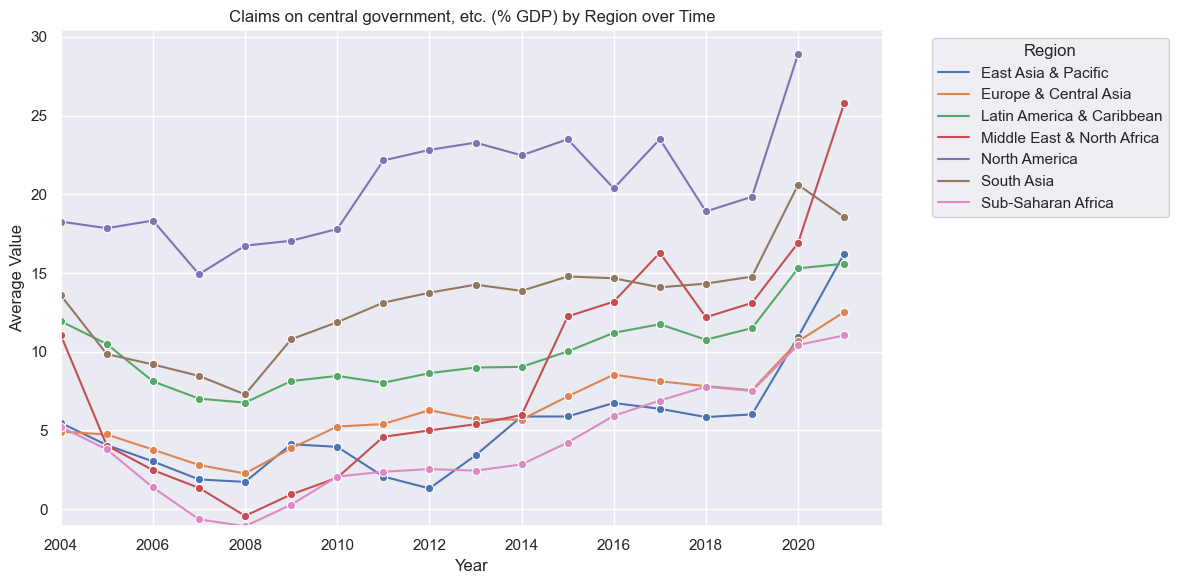

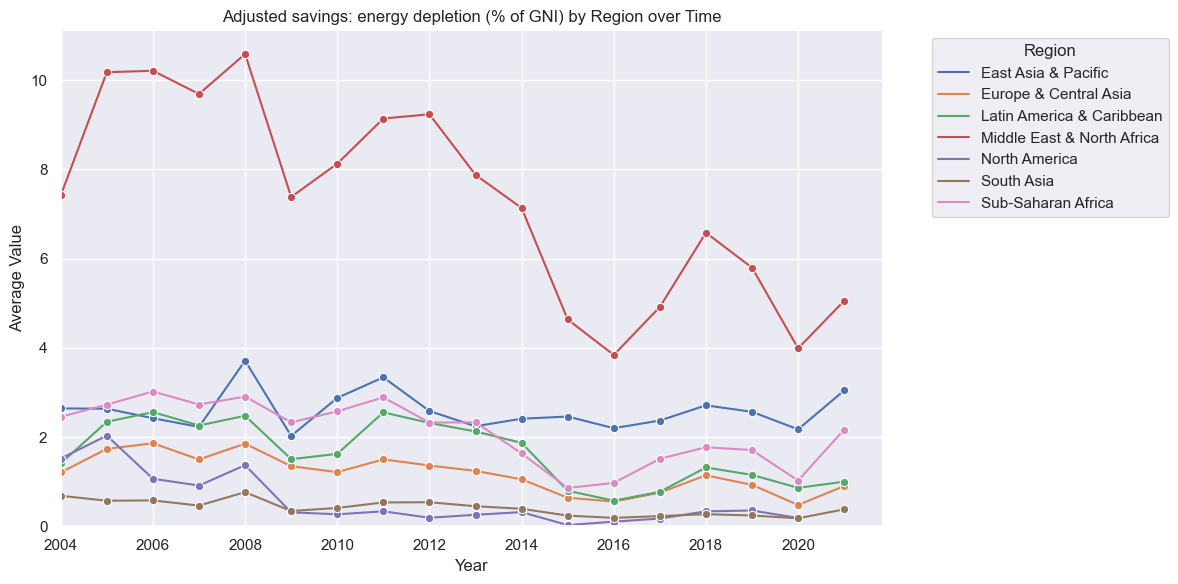

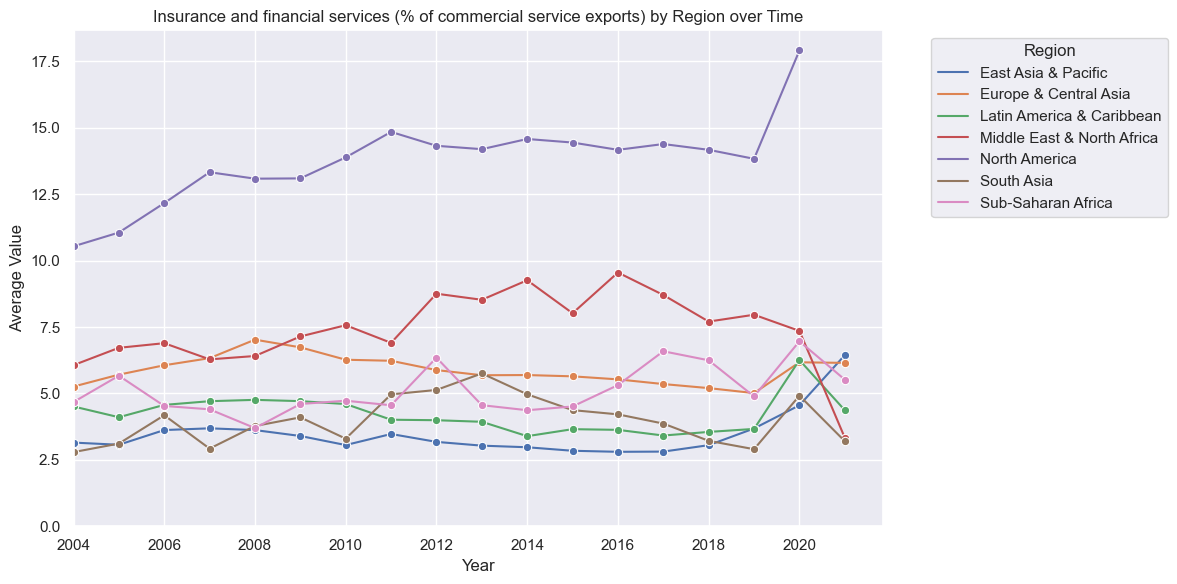

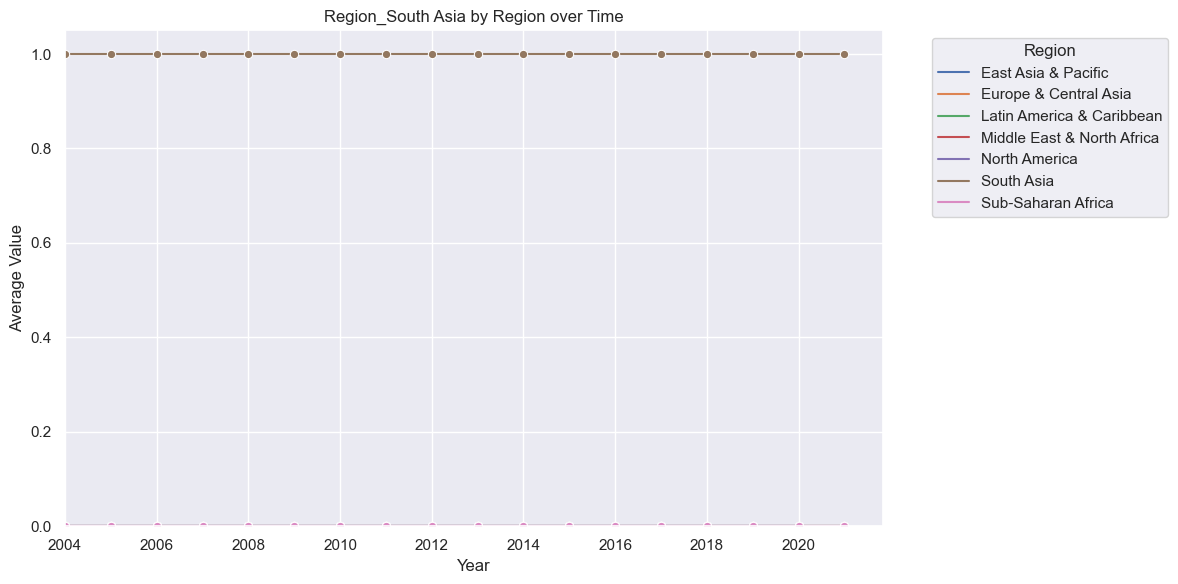

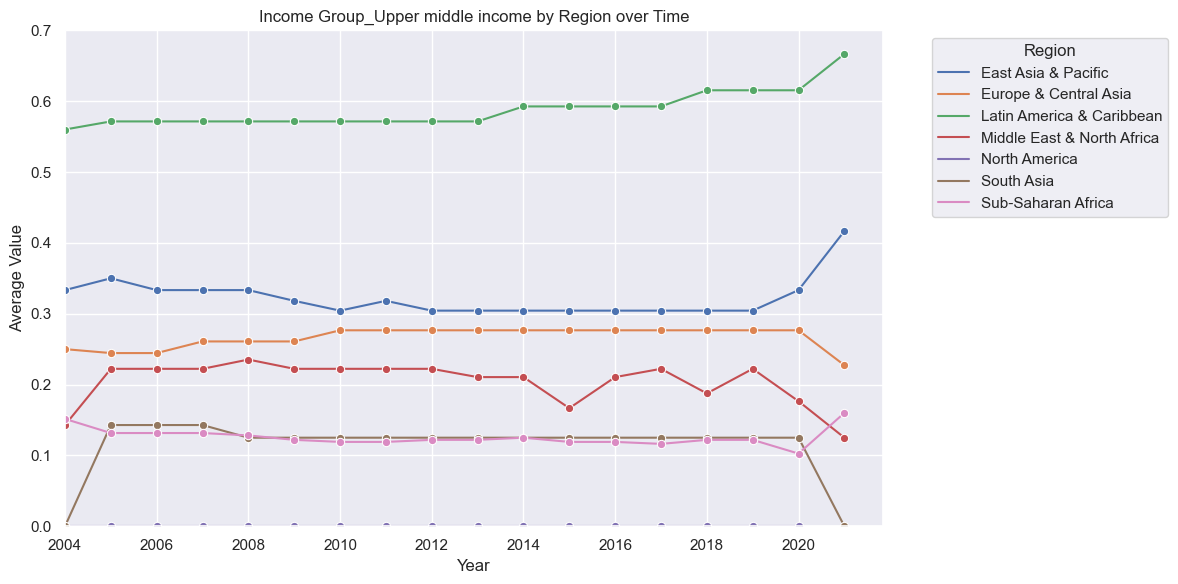

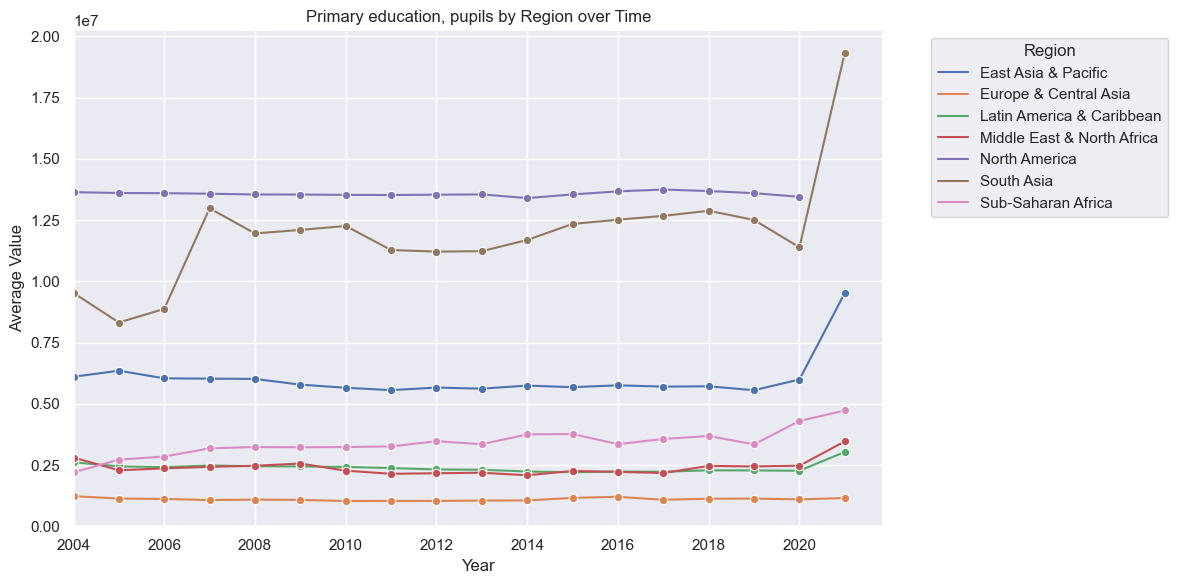

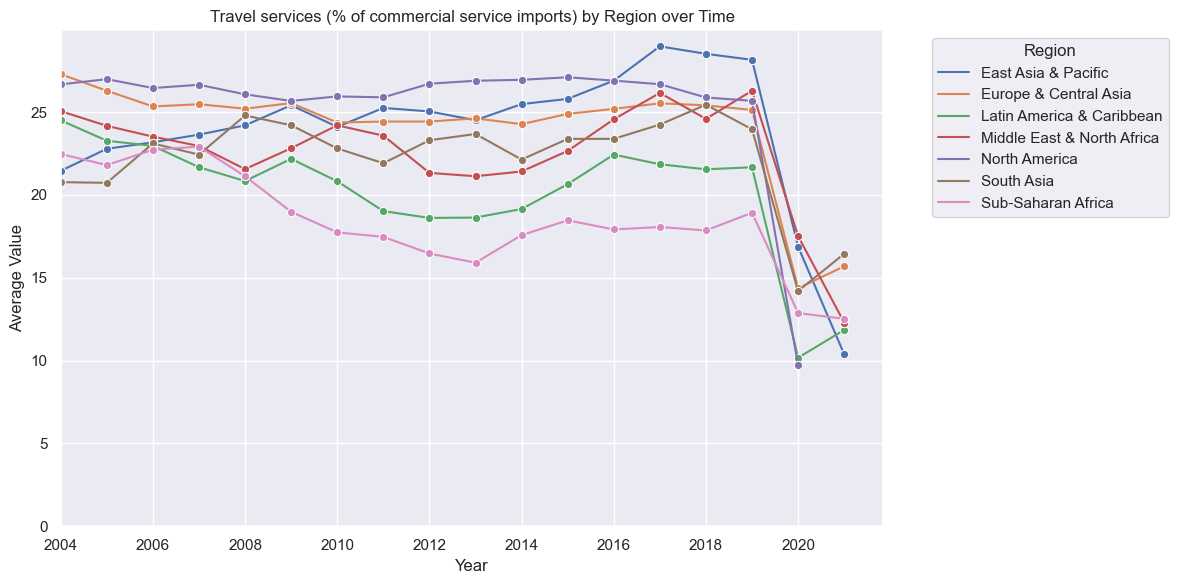

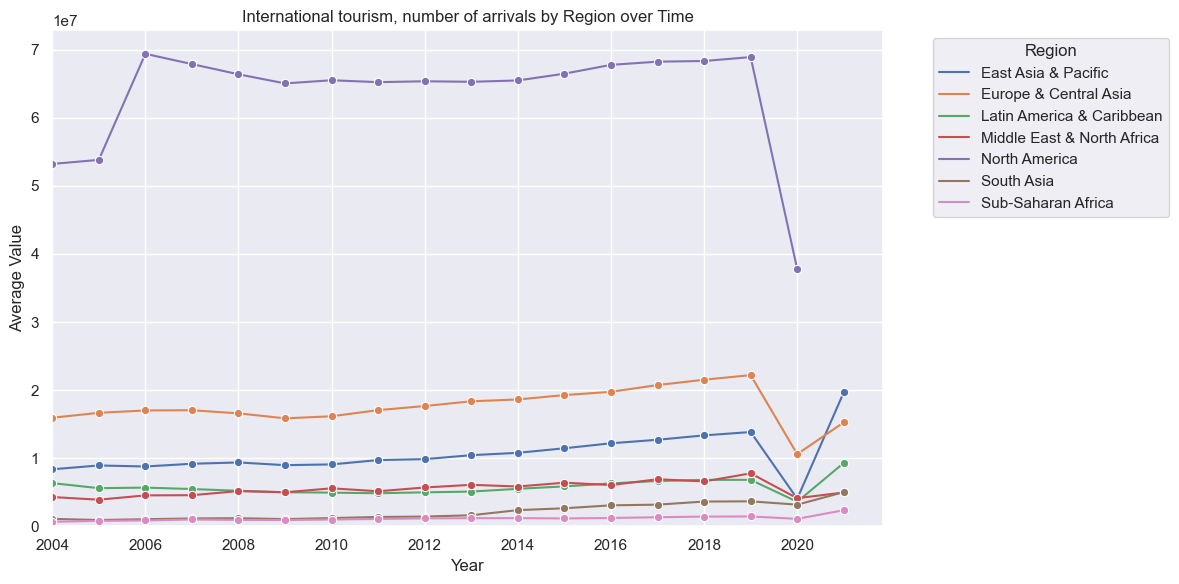

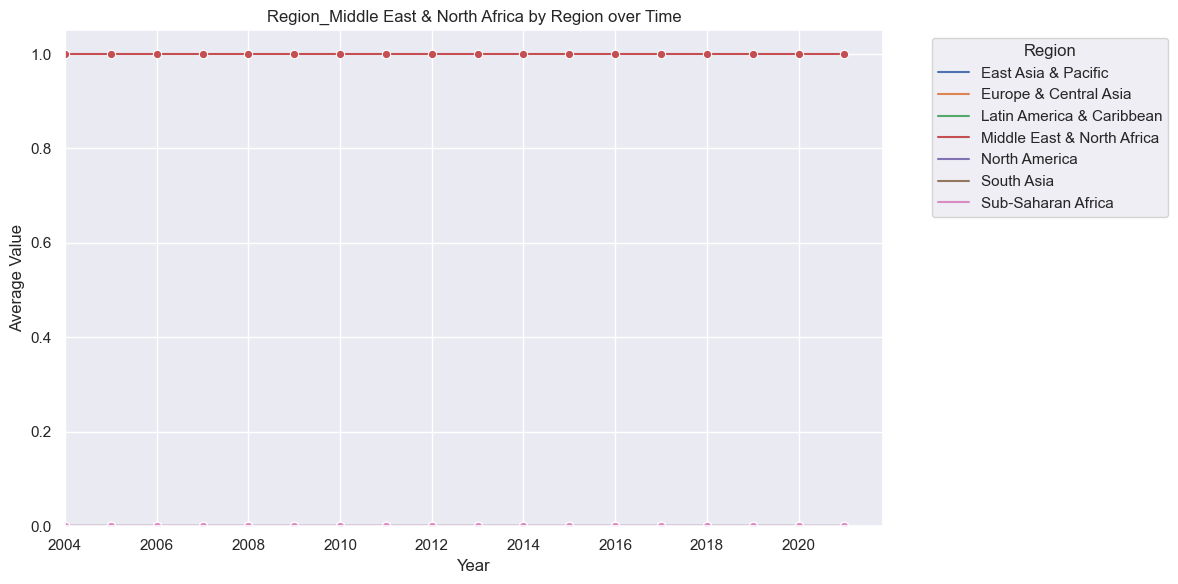

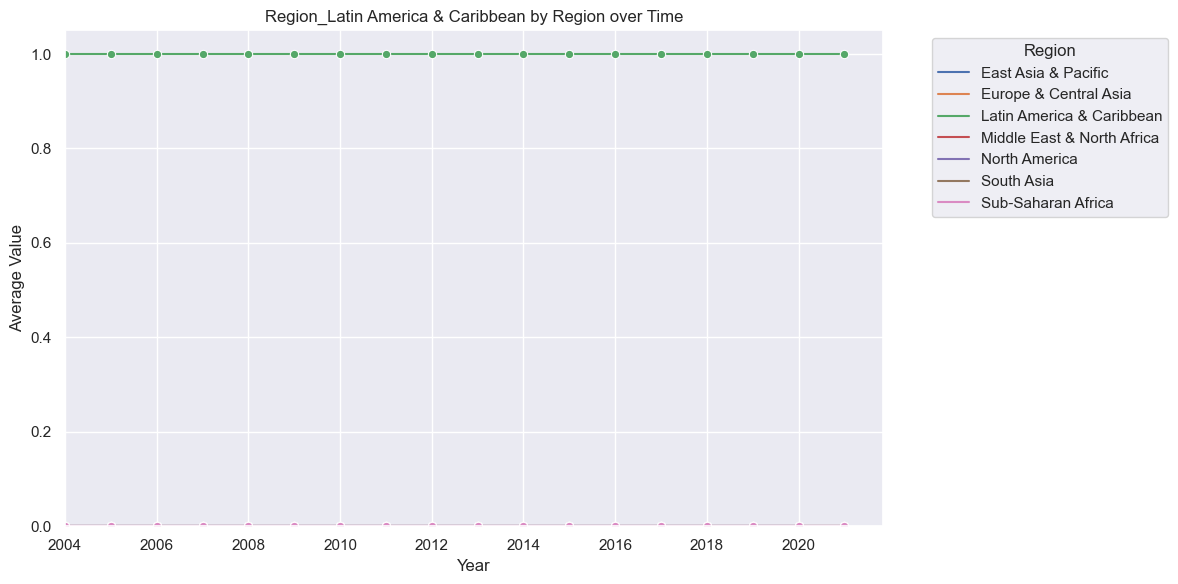

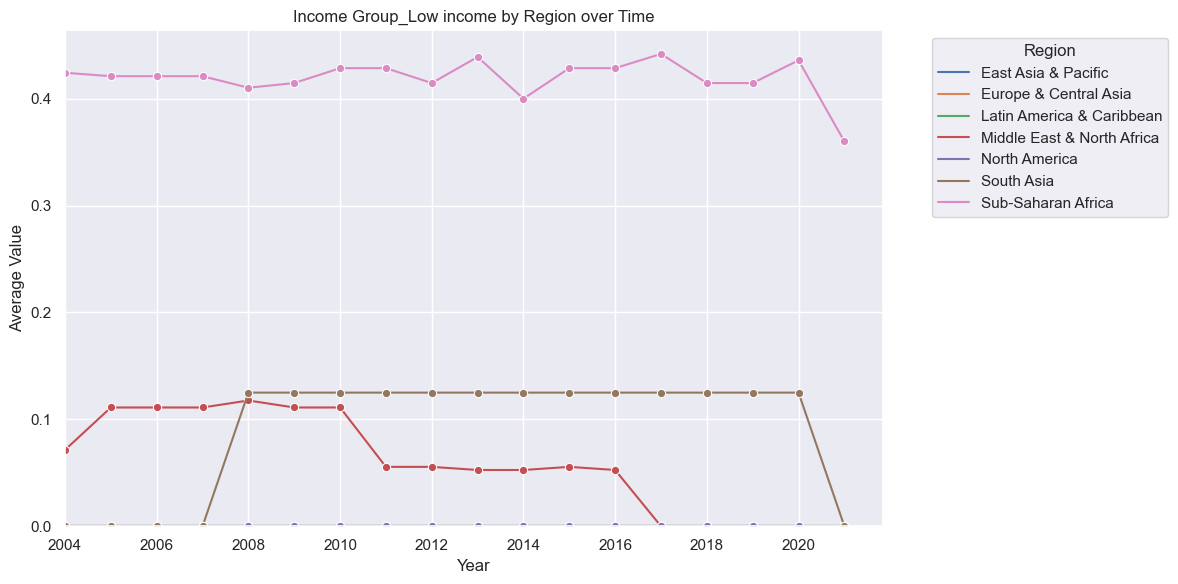

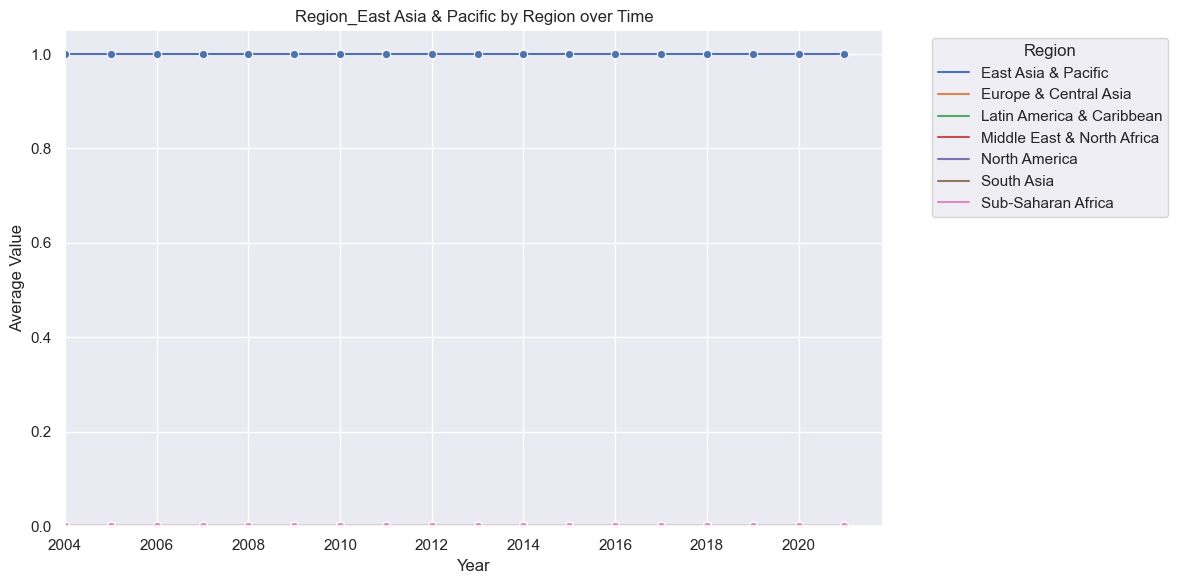

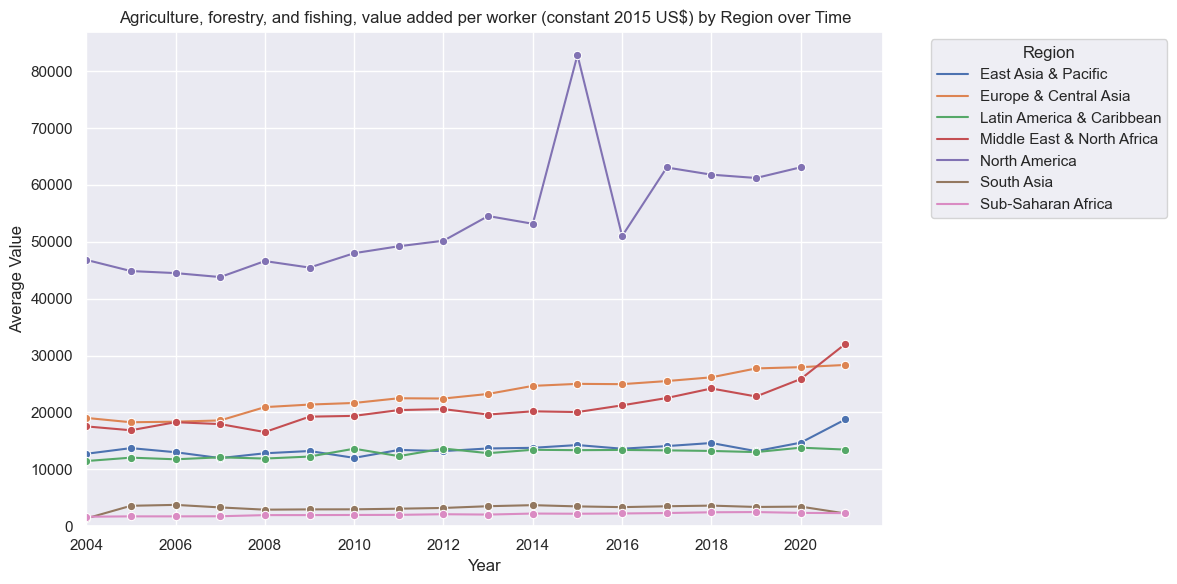

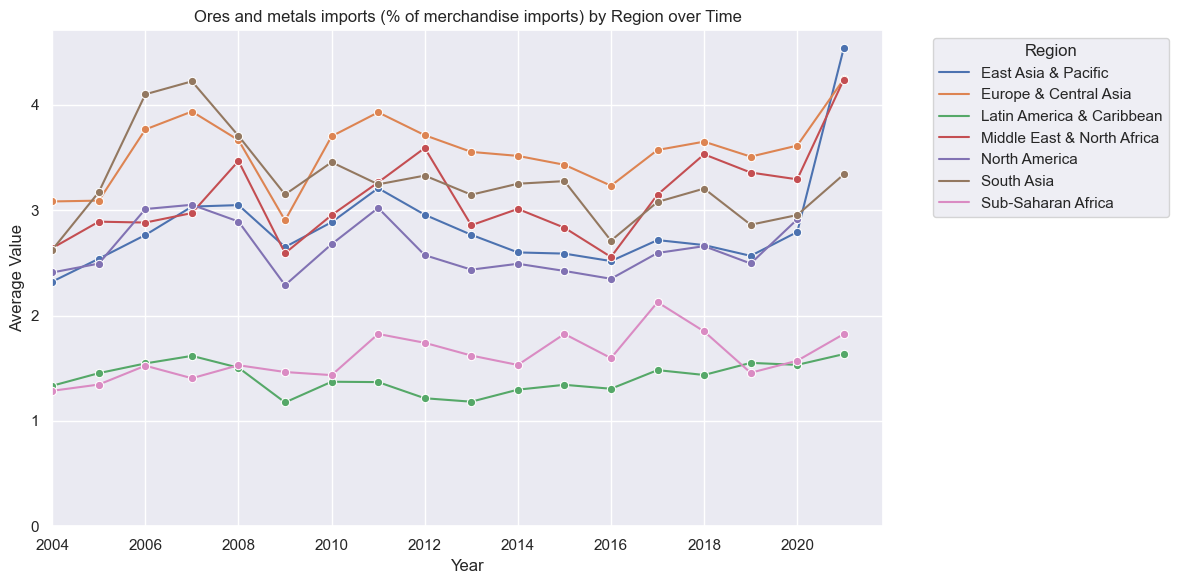

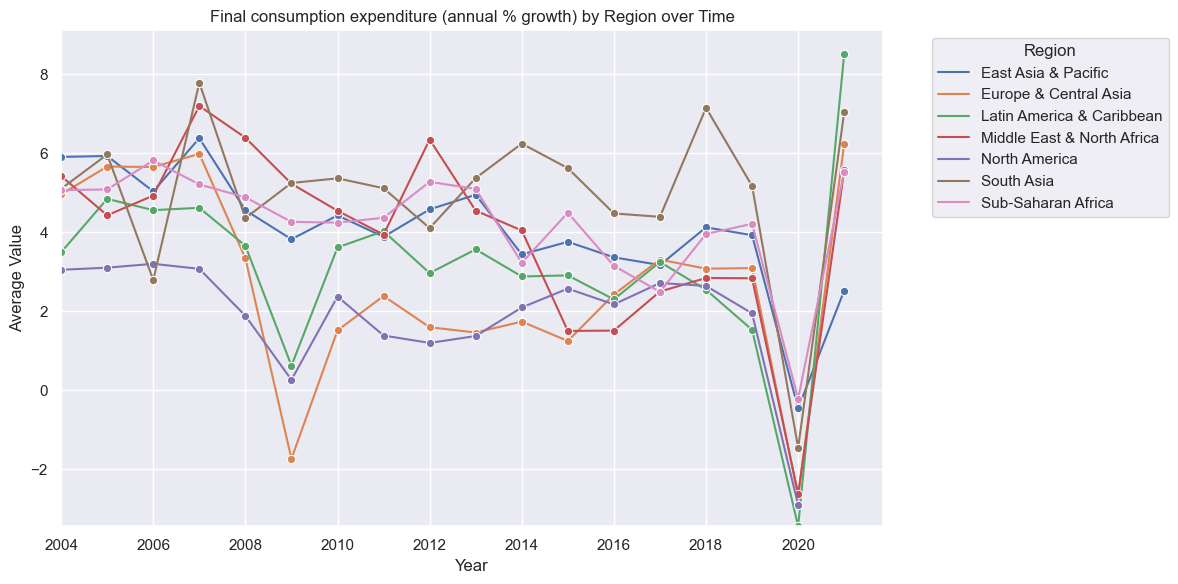

In [115]:
env_fields = 'env_fields.csv'
health_fields = 'health_fields.csv'
socio_fields = 'socio_fields.csv'

create_eda_visuals_for_fields(env_fields, df, region_col='Region', year_col='Year')
create_eda_visuals_for_fields(health_fields, df, region_col='Region', year_col='Year')
create_eda_visuals_for_fields(socio_fields, df, region_col='Region', year_col='Year')